Simple undirected, unweighted graph in Python

In [3]:
import matplotlib.pyplot as plt
import random

class Graph:
    def __init__(self):
        self.adj_list = []
        for i in range(10):
            self.adj_list.append([])

    def add(self, node_from, node_to):
        self.adj_list[node_from].append(node_to)

    def get_deg(self, node):
        return len(self.adj_list[node])

    def print(self):
        for i in range(10):
            if len(self.adj_list[i]) == 0: continue
            print('\nOut Deg(' + str(i) + ') = ' + str(self.get_deg(i)))
            for node_to in self.adj_list[i]:
                print(str(i) + ' -> ' + str(node_to))  

    def drawGraph(self):
        plt.title("A Simple UnDirected Graph")
        plt.xlim(-80,180)
        plt.ylim(-20,110)  
        y = [0, 10, -15, 99, 54, 20, 70, 81, 69, -8]
        y = self.get_rand_edges()
        for i in range(10):
            plt.plot([i*14], [y[i]], marker="o", markersize=20)
            plt.text(i*14, y[i], str(i))
            for node in self.adj_list[i]:
                x_values = [i*14, node*14]
                y_values = [y[i], y[node]]
                plt.plot([i*14, node*14], y_values, linestyle="--", color='blue')
        plt.show()     
    
    def get_rand_edges(self):
        edges = []
        for i in range(10):
            edges.append(random.randint(-15, 100))
        return edges    

    def test():
        g = Graph()
        g.add(0, 5)
        g.add(0, 3)
        g.add(0, 6)
        g.add(0, 8)
        g.add(1, 2)
        g.add(1, 0)
        g.add(5, 7)
        g.print()    
        g.drawGraph()

Sample driver code


Out Deg(0) = 4
0 -> 5
0 -> 3
0 -> 6
0 -> 8

Out Deg(1) = 2
1 -> 2
1 -> 0

Out Deg(5) = 1
5 -> 7


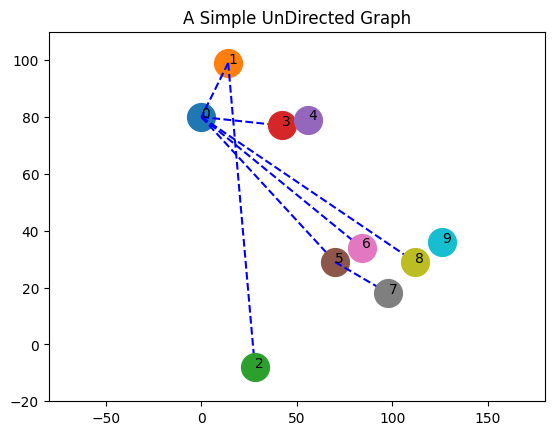

In [4]:
Graph.test()